In [55]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Question1

In [56]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Question 2

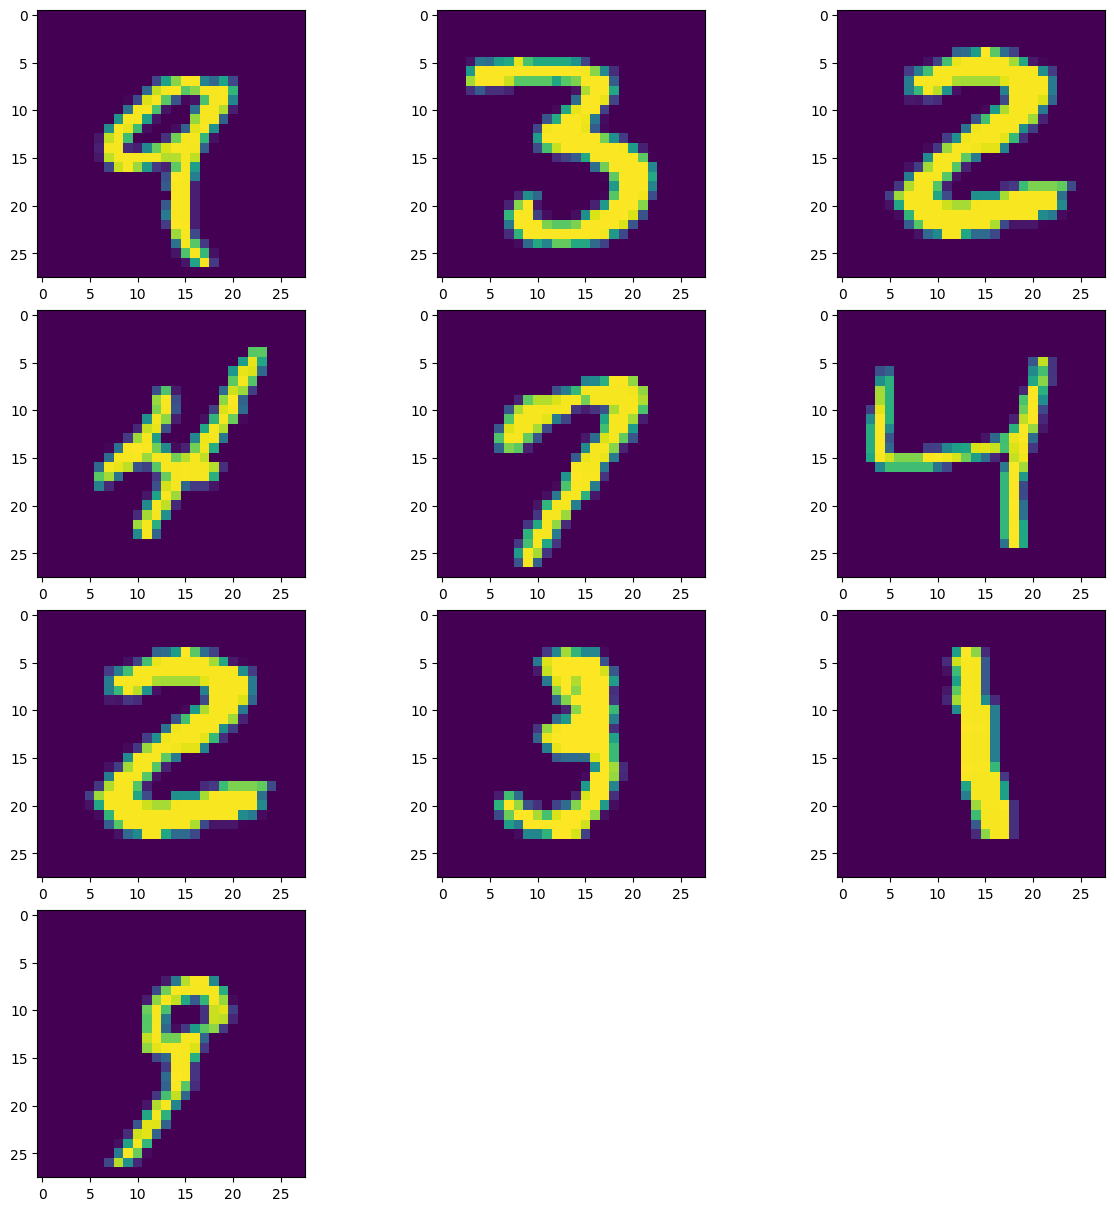

In [57]:
n_it = 10
cols_per_row = 3
n_rows = 4
width_per_plot = 4
height_per_plot = 3
fig, axs = plt.subplots(n_rows, cols_per_row, figsize=(width_per_plot * cols_per_row, height_per_plot * n_rows),
                        constrained_layout=True)

rand_indexes = np.random.randint(0, x_train.shape[1], n_it)
for i, r in zip(range(n_it), rand_indexes):
    axis_indexes = np.unravel_index(i, axs.shape)  # subplot index for column
    ax = axs[axis_indexes]
    ax.imshow(x_train[r])

# hide empty plots (4x3 grid)
for i in range(n_it, n_rows * cols_per_row):
    axis_indexes = np.unravel_index(i, axs.shape)
    axs[axis_indexes].set_visible(False)